# Modelos probabilísticos


No queremos únicamente obtener una descripción de los datos que han salido de una muestra de la población, sino intentar, a partir de los resultados observados, obtener propiedades de TODA la población en estudio, así como cuantificar la incertidumbre que genera dicha generalización.

Los modelos probabilísticos actúan como puente entre lo observado (muestra) y lo desconocido (población) y el cáculo de probabilidades con dichos modelos cuantificará la incertidumbre de la generalización. 

__[Definición: Variable aleatoria]__ Una variable aleatoria es toda función cuyos valores numéricos, 
por depender del resultado de un fenómeno aleatorio, se producen al azar, tomando diversos valores con distintas 
probabilidades.


Las variables aleatorias se clasifican en:


* __DISCRETAS__: Variables aleatorias que toman valores numéricos aislados y puntuales:
    * Número de clientes que ponen una reclamación en la empresa de 50 elegidos al azar. 
    * Avisos de Whatsapp que recibimos en nuestro móvil cada día.
    * Pacientes que asisten a urgencias en un Centro de Salud al año.
    
* __CONTINUAS__: Variables aleatorias que toman todos los valores posibles en un rango determinado:
    * Estatura de un individuo.
    * Nivel de colesterol de un individuo.
    * Salarios en una determinada empresa.


## Variables discretas

### Distribución Bernoulli: $\mathcal{B}(p)$

A los experimentos aleatorios en los que solo se pueden dar dos resultados posibles: éxito y fracaso.

__[Ejemplo]__: Lanzamiento de una moneda trucada: la probabilidad de salir cara (éxito) es 0.8

$$X=\begin{cases}
0 & \mbox{sale cruz}\\
1 & \mbox{sale cara}
\end{cases}
$$

Entonces $X \sim \mathcal{B}(0.8)$

La __función masa de probabilidad__ (_pmf_ en sus siglas en inglés) es 

$$p_1=P(X=x_1)=P(X=0)=1-p, \quad p_2=P(X=x_2)=P(X=1)= p$$

Para el ejemplo anterior, 

|Valor X          |0  |1  |
|-----------------|---|---|
|$p_i$       |0.2|0.8|


Populating the interactive namespace from numpy and matplotlib


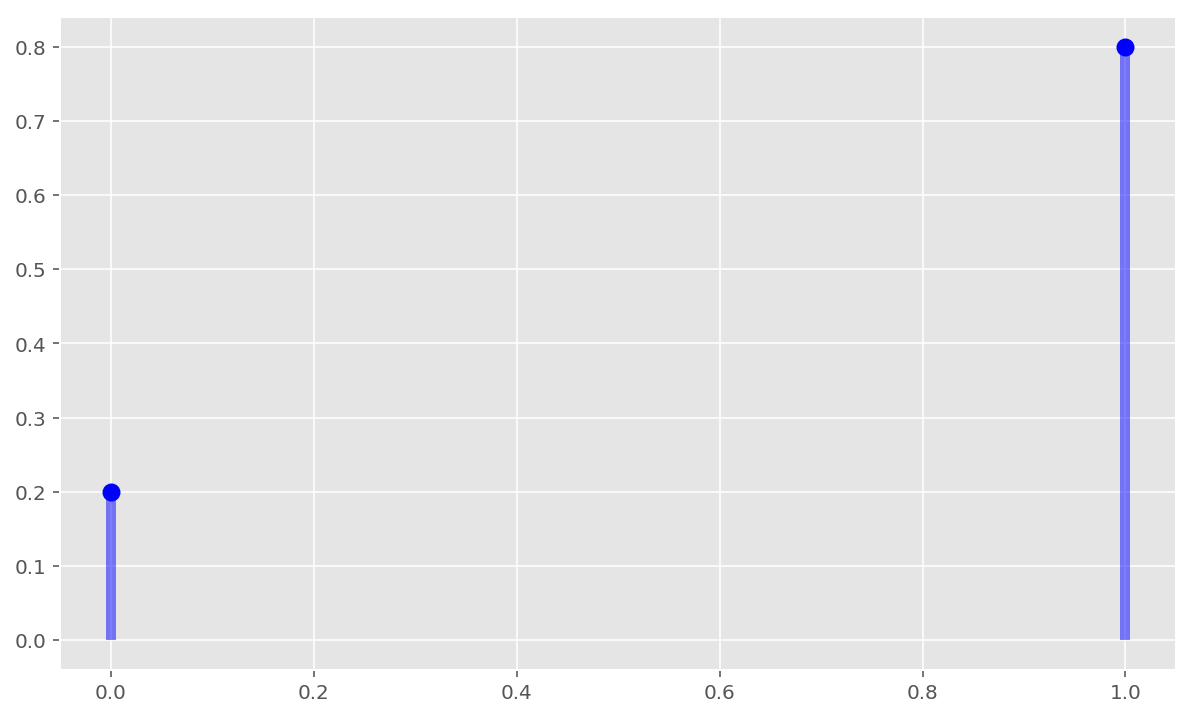

In [32]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
pylab.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

import scipy.stats as st
import pandas as pd

fig, ax = plt.subplots(1, 1)

p = 0.8

x = np.array([0.0, 1.0])
ax.plot(x, st.bernoulli.pmf(x, p), 'bo', ms=8, label='Bernoulli pmf')
ax.vlines(x, 0, st.bernoulli.pmf(x, p), colors='b', lw=5, alpha=0.5);

### Distribución Binomial: $\mathcal{Bi}(n,p)$

Si un experimento de Bernoulli se realiza consecutivamente $n$ veces, de forma independiente, y siempre en las mismas condiciones que la primera vez, entonces podemos calcualr el _número total de éxitos_ conseguidos en las $n$ repeticiones. 

En ese caso, $X$, el número de éxitos en $n$ intentos, con probabilidad de éxito $p$ sigue una distribución Binomial: $\mathcal{Bi}(n,p)$. La __función masa de probabilidad__ (pmf)

$$P(X=k) = {n \choose k} p^k \cdot (1-p)^{n-k}$$

__[Ejemplo:]__ Número de choches vendidos, de los 10 que hay en el concesionario, con una probabilidad de venta del coche de 0.31. Entonces $$X\sim \mathcal{Bi}(10, 0.31)$$


In [33]:
n = 10
p = 0.31
x = np.arange(11)
st.binom.pmf(x, n, p)

array([  2.44619406e-02,   1.09901472e-01,   2.22192107e-01,
         2.66201172e-01,   2.09295849e-01,   1.12837762e-01,
         4.22460220e-02,   1.08457696e-02,   1.82727640e-03,
         1.82433393e-04,   8.19628287e-06])

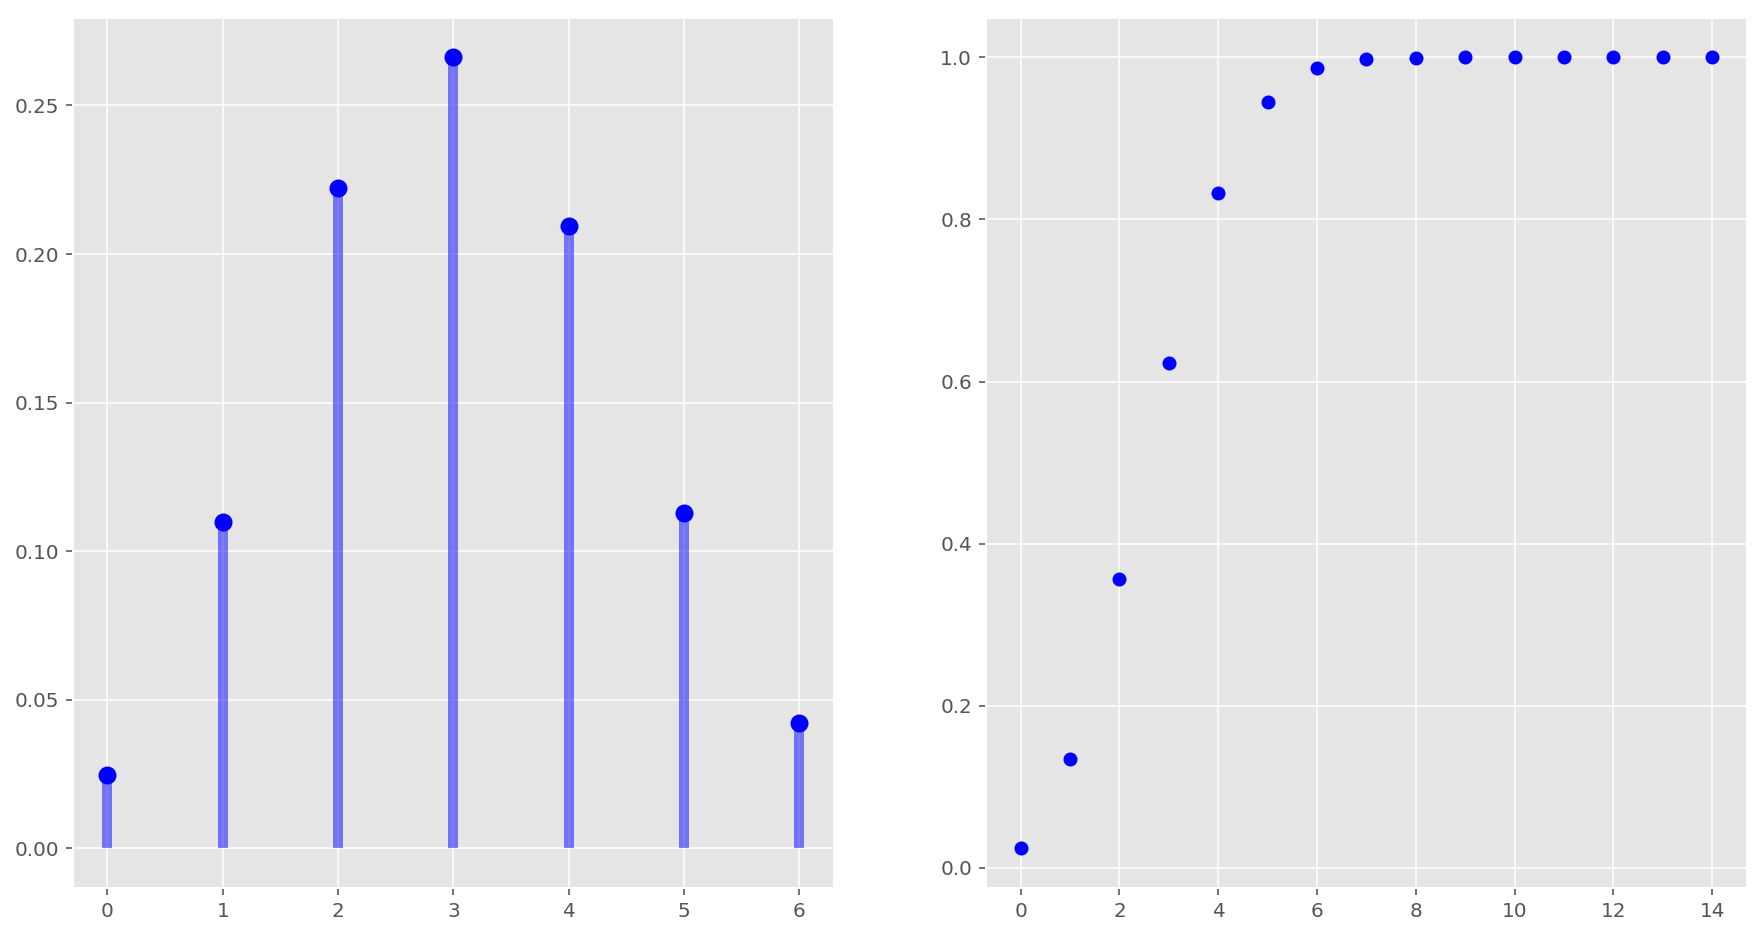

In [34]:
fig, ax = plt.subplots(1,2,figsize=(15,8))

x = np.arange(st.binom.ppf(0.01, n, p),st.binom.ppf(0.99, n, p))
ax[0].plot(x, st.binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax[0].vlines(x, 0, st.binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5);


xx = np.arange(15)
ax[1].plot(xx, st.binom.cdf(xx, n, p), 'bo'); # Función de distribución (cdf en sus siglas en inglés)

### Distribución Poisson: $\mathcal{Po}(\lambda)$

Describen el número de veces que ocurre un suceso por unidad de tiempo o espacio:

* Avisos de Whatsapp que recibimos en nuestro móvil cada día.
* Pacientes que asisten a urgencias en un Centro de Salud al año.

La distribución queda definida por el parámetro $\lambda$ que representa el número medio de ocurrencias del suceso. Por ejemplo, Si $X$ representa el número de avisos de Whatsapp que recibimos en nuestro móvil cada día, y modelamos $X$ como

$$ X \sim \mathcal{Po} (54)$$ 

significa que recibimos como media al día 54 avisos al móvil. 

La función masa de probabilidad es 

$$P(X=k) = \frac{e^{-\lambda} \cdot \lambda^k}{k!}$$

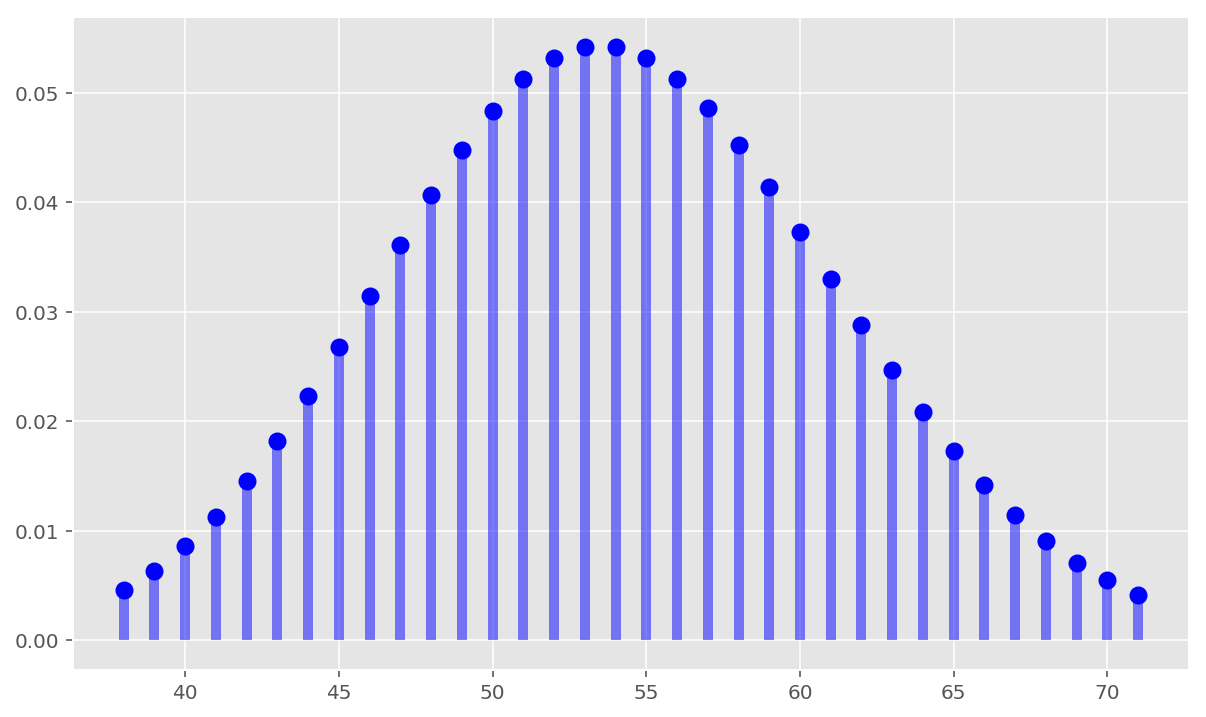

In [35]:
fig, ax = plt.subplots(1, 1)

λ = 54 # \lambda + TAB

x = np.arange(st.poisson.ppf(0.01, λ),st.poisson.ppf(0.99,λ))
ax.plot(x, st.poisson.pmf(x, λ), 'bo', ms=8, label='Poisson pmf')
ax.vlines(x, 0, st.poisson.pmf(x, λ), colors='b', lw=5, alpha=0.5);

## Variables continuas

### Distribución normal

Tiene como __función de densidad__ (no confundir con función masa de probabilidad):

$$f(x|\mu, \sigma) = \frac{1}{\sqrt{2\pi \sigma^2}} \cdot e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

Esta función permite calcular la probabilidad de intervalos en los que está definida la variable aleatoria. Por ejemplo, la variable $X$ podría medir los ingresos en miles de euros de varios departamentos cada día del mes, entonces

$$X \sim \mathcal{N} (5,2)$$

y por tanto su función de densidad sería

$$f(x|5,2) = \frac{1}{\sqrt{8\pi}} \cdot e^{-\frac{(x-5)^2}{8}}$$

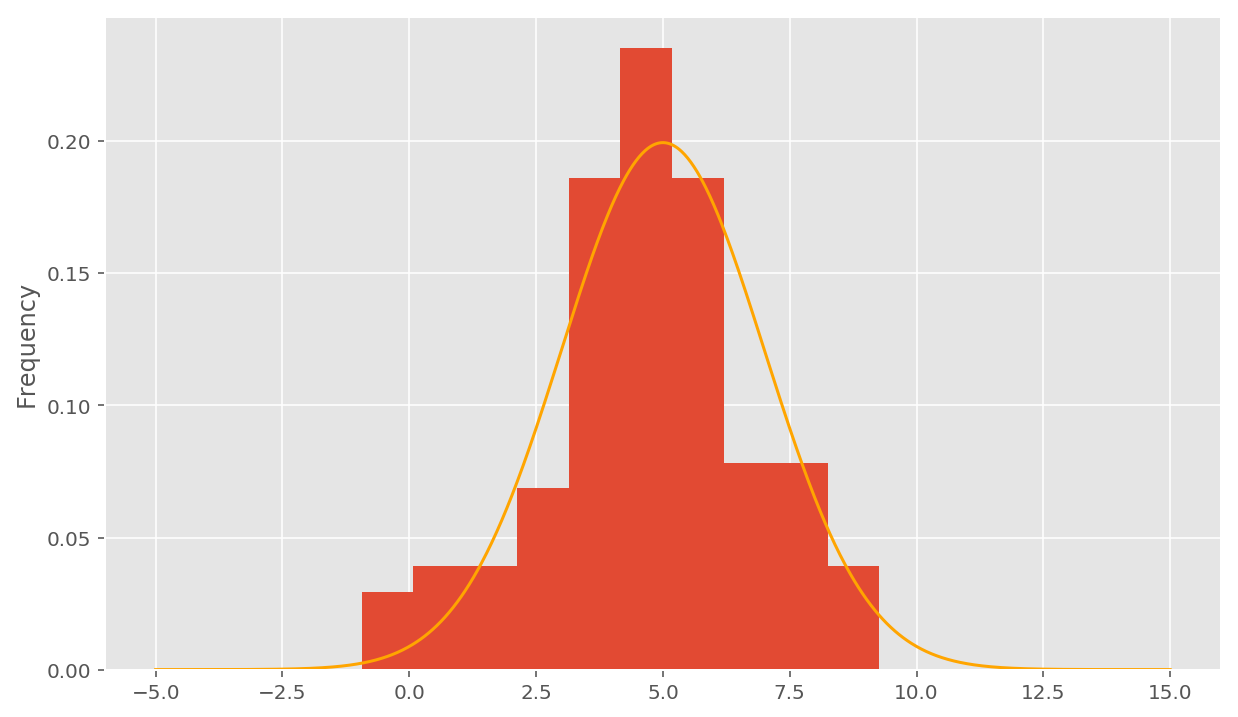

In [36]:
fig, ax = plt.subplots(1,1)

data = pd.DataFrame(st.norm(loc=5, scale=2).rvs(100))
data.plot(kind='hist', normed = 'True', ax = ax)

x = np.linspace(-5,15,1000)
y = st.norm(loc=5, scale=2).pdf(x)
ax.plot(x,y,color='orange');
ax.legend_.remove()

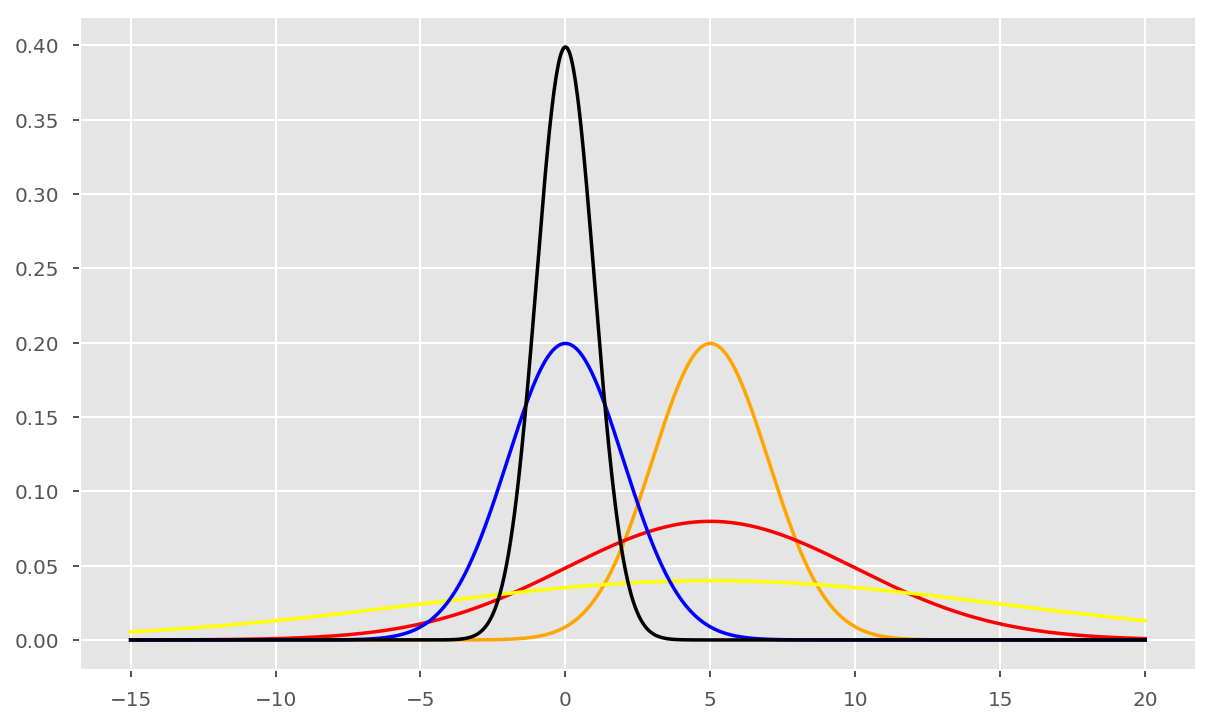

In [30]:
fig, ax = plt.subplots(1,1)


x = np.linspace(-15,20,1000)
y1 = st.norm(loc=5, scale=2).pdf(x)
ax.plot(x,y1,color='orange');
y2 = st.norm(loc=5, scale=5).pdf(x)
ax.plot(x,y2,color='red');
y3 = st.norm(loc=5, scale=10).pdf(x)
ax.plot(x,y3,color='yellow');

y4 = st.norm(loc=0, scale=2).pdf(x)
ax.plot(x,y4,color='blue');
y5 = st.norm(loc=0, scale=1).pdf(x)
ax.plot(x,y5,color='black');

### Distribución Chi-cuadrado: $\chi^2(m)$

Se define como la suma de distribuciones normales estandarizadas independientes al cuadrado, es decir,

$$Y = \sum_{i=1}^m Z_i^2, \quad \mbox{siendo} \quad Z_i \sim \mathcal{N}(0,1)$$

El único parámetro en esta distribución es saber cuántas normales estandarizadas tenemos que sumar $(m)$, también llamado _grados de libertad_ (df en sus siglas en inglés). La función de densidad es 

$$ f(x| m) = \frac{1}{2\cdot \Gamma(m/2)} \cdot \left(\frac{x}{2}\right)^{m/2-1} \cdot e^{-x/2} $$

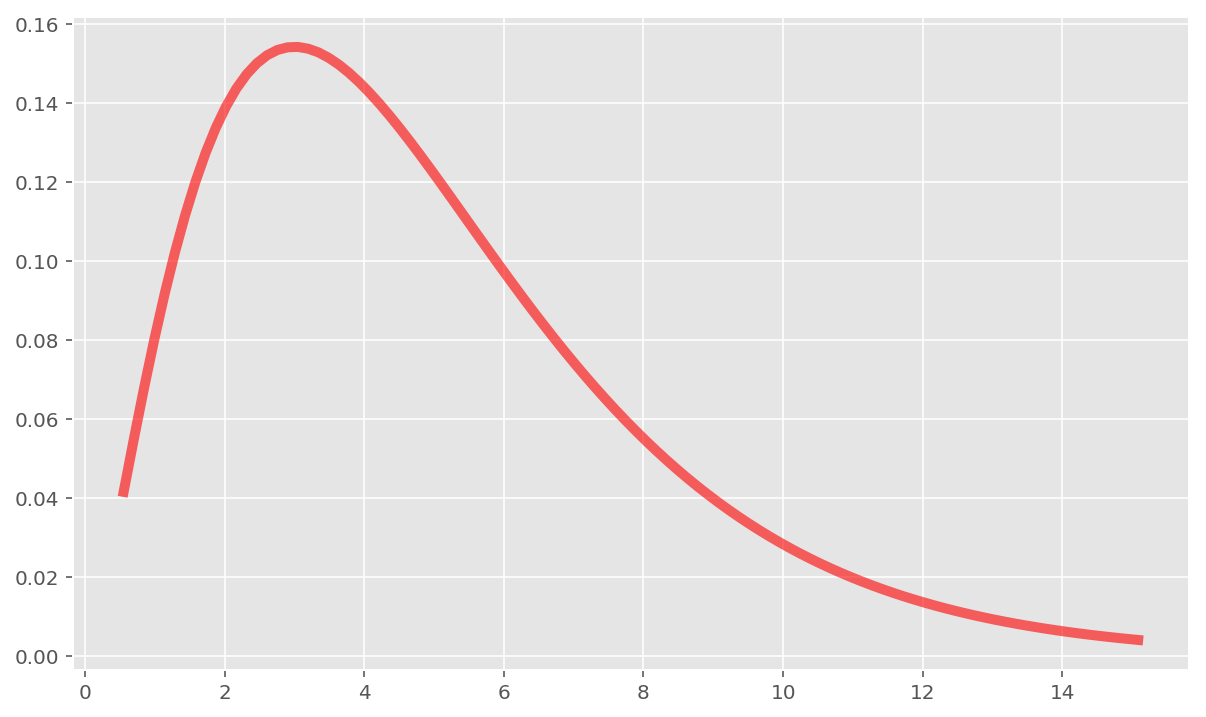

In [39]:
fig, ax = plt.subplots(1, 1)

df = 5

x = np.linspace(st.chi2.ppf(0.01, df), st.chi2.ppf(0.99, df), 100)
ax.plot(x, st.chi2.pdf(x, df), 'r-', lw=5, alpha=0.6, label='chi2 pdf');

### Distrubución t-Student

Consideremos dos variables aleatorias $X \sim  \mathcal{N}(0,1)$ e $Y \sim \chi^2(m)$, entonces la variable

$$ T = \frac{X}{\sqrt{\frac{Y}{m}}} $$

se distribuye como una distribución t-Student con $m$ grados de libertad, $t(m)$, con función de densidad

$$f(x|m) = \frac{\Gamma((m+1)/2)}{\sqrt{\pi \cdot m} \cdot \Gamma(df/2) \cdot (1+x^2/m)^{(m+1)/2}} $$

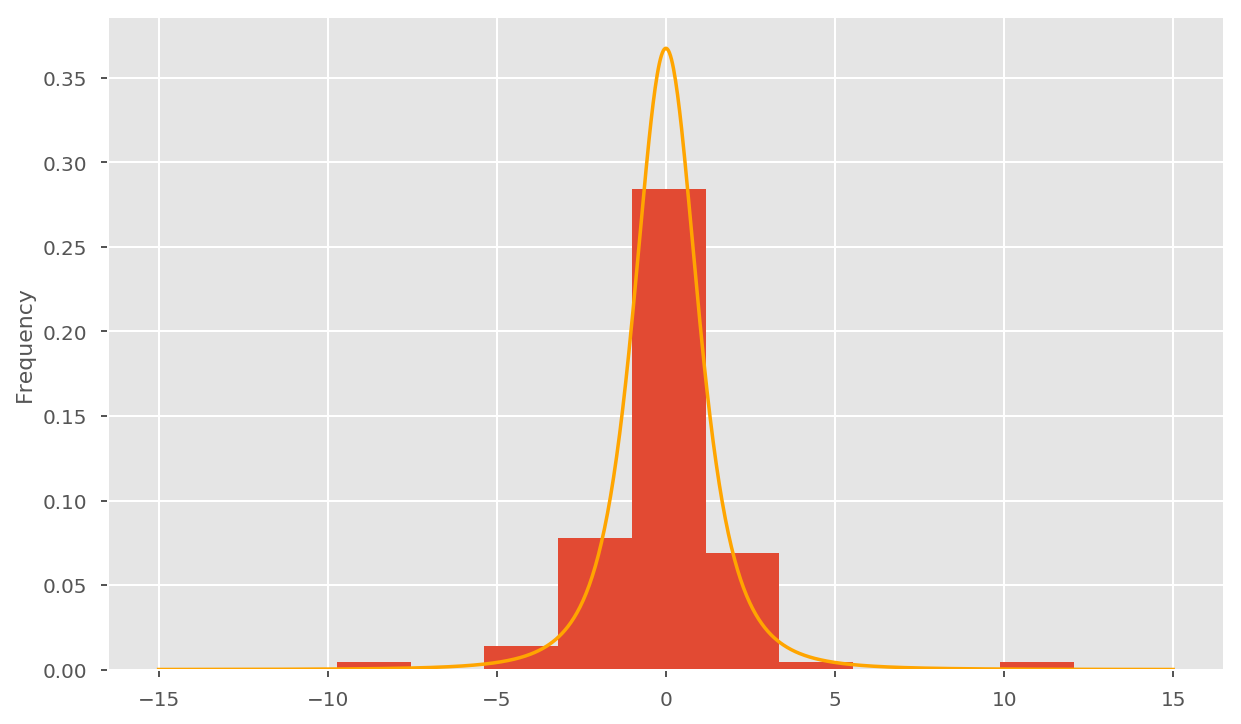

In [24]:
fig, ax = plt.subplots(1,1)

data = pd.DataFrame(st.t(3).rvs(100))
data.plot(kind='hist', normed = 'True', ax = ax)

x = np.linspace(-15,15,1000)
y = st.t(3).pdf(x)
ax.plot(x,y,color='orange');
ax.legend_.remove()

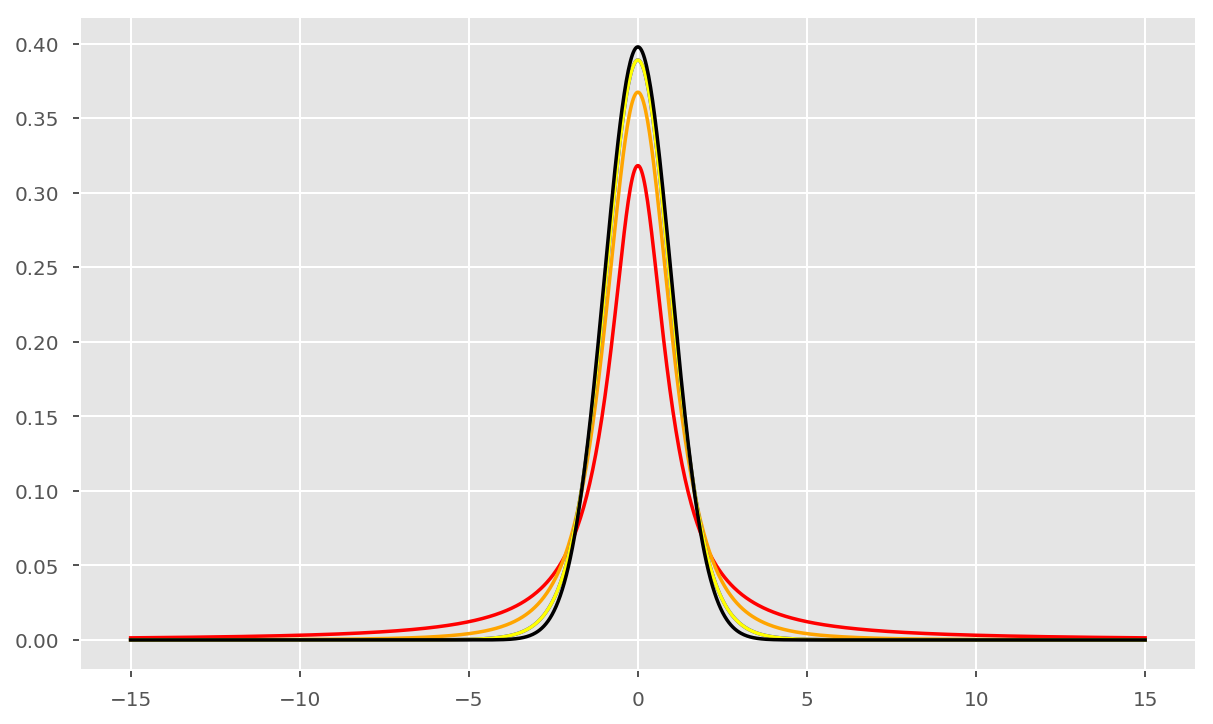

In [33]:
fig, ax = plt.subplots(1,1)

x = np.linspace(-15,15,1000)

y0 = st.t(1).pdf(x)
ax.plot(x,y0,color='red');

y1 = st.t(3).pdf(x)
ax.plot(x,y1,color='orange');

y2 = st.t(10).pdf(x)
ax.plot(x,y2,color='blue');

y3 = st.t(20).pdf(x)
ax.plot(x,y2,color='yellow');

y4 = st.t(100).pdf(x)
ax.plot(x,y4,color='black');


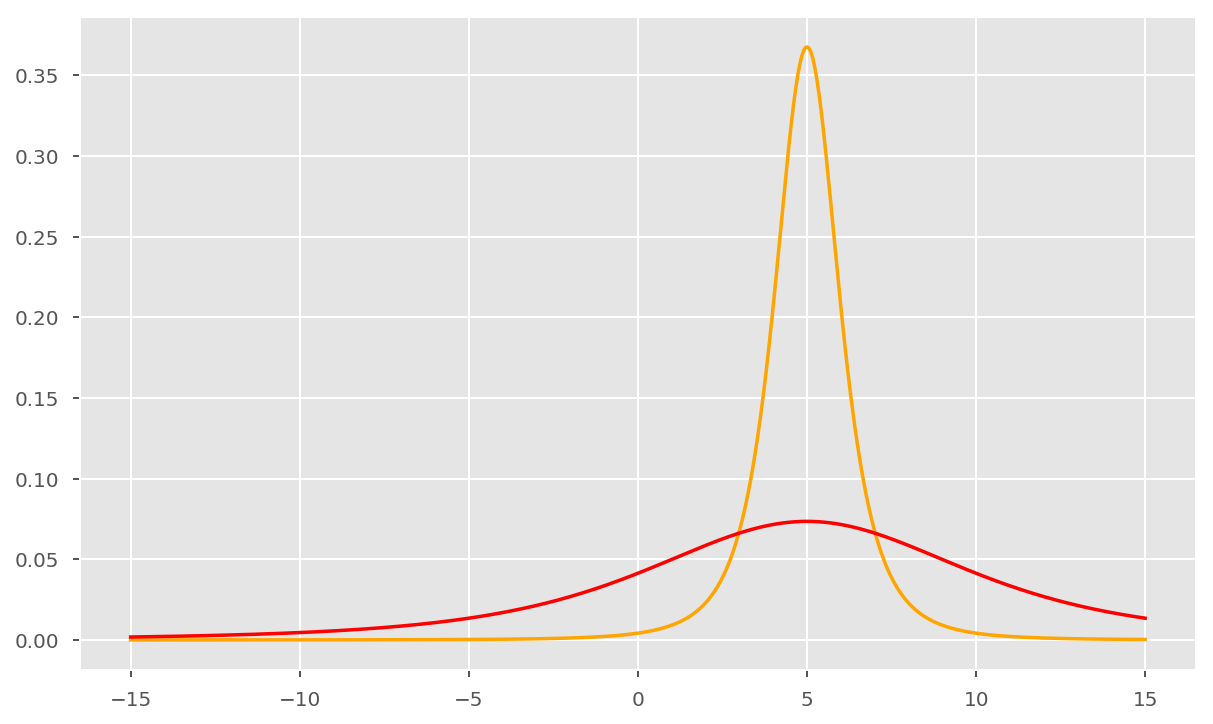

In [35]:
fig, ax = plt.subplots(1,1)

x = np.linspace(-15,15,1000)

y1 = st.t(3,loc=5).pdf(x)
ax.plot(x,y1,color='orange');

y2 = st.t(3,loc=5, scale=5).pdf(x)
ax.plot(x,y2,color='red');